# Project 2 - Ames Housing Data and Kaggle Challenge

Welcome to Project 2! It's time to start modeling.

**Primary Learning Objectives:**

1. Creating and iteratively refining a regression model
1. Using [Kaggle](https://www.kaggle.com/) to practice the modeling process
1. Providing business insights through reporting and presentation.

You are tasked with creating a regression model based on the Ames Housing Dataset. This model will predict the price of a house at sale.

The Ames Housing Dataset is an exceptionally detailed and robust dataset with over 70 columns of different features relating to houses.

Secondly, we are hosting a competition on Kaggle to give you the opportunity to practice the following skills:

- Refining models over time
- Use of train-test split, cross-validation, and data with unknown values for the target to simulate the modeling process
- The use of Kaggle as a place to practice data science

As always, you will be submitting a technical report and a presentation. **You may find that the best model for Kaggle is not the best model to address your data science problem.**

## EDA
- **Read the data dictionary.**
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.

In [1]:
# Import packages that will be used in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder

from sklearn import metrics

In [2]:
# Read in the train and test files
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [3]:
# Look at head of train
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
# Look at shape of train
train.shape

(2051, 81)

In [5]:
# Looking at the NA values
na_values = train.isnull().sum()

In [6]:
# Sorting NA values
na_values[na_values>0].sort_values(ascending=False)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Mas Vnr Type      1240
Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Qual           55
BsmtFin Type 1      55
Bsmt Cond           55
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
dtype: int64

In [7]:
# Looking at info of train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [8]:
# Looking at unique data types
train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [9]:
# Look for outliers
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [10]:
# Looking at column names
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

## Data Cleaning
- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
- Do you want to manually drop collinear features?

In [11]:
# Dropping columns first to work with a smaller dataset
train_new = train.drop(columns = ['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Condition 1','Condition 2','Roof Style',
       'Roof Matl','Exter Cond','Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 
        'BsmtFin Type 1','BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
        'Heating', 'Heating QC', 'Central Air', 'Electrical','Low Qual Fin SF', 'Gr Liv Area',
        'Bsmt Half Bath', 'Kitchen AbvGr','Fireplace Qu', 'Garage Finish', 'Garage Cond', 
        'Enclosed Porch', '3Ssn Porch','Screen Porch',  'Pool QC', 'Fence', 'Misc Feature',
       'Misc Val',  'Sale Type','Bsmt Qual','BsmtFin Type 1','BsmtFin SF 1','Garage Qual',
        'Kitchen AbvGr','Bsmt Half Bath','Misc Val','Pool Area'])

In [12]:
train_new.head()

,Id,Lot Area,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exterior 1st,...,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
0,109,13517,Sawyer,1Fam,2Story,6,8,1976,2005,HdBoard,...,Attchd,1976.0,2.0,475.0,Y,0,44,3,2010,130500
1,544,11492,SawyerW,1Fam,2Story,7,5,1996,1997,VinylSd,...,Attchd,1997.0,2.0,559.0,Y,0,74,4,2009,220000
2,153,7922,NAmes,1Fam,1Story,5,7,1953,2007,VinylSd,...,Detchd,1953.0,1.0,246.0,Y,0,52,1,2010,109000
3,318,9802,Timber,1Fam,2Story,5,5,2006,2007,VinylSd,...,BuiltIn,2007.0,2.0,400.0,Y,100,0,4,2010,174000
4,255,14235,SawyerW,1Fam,1.5Fin,6,8,1900,1993,Wd Sdng,...,Detchd,1957.0,2.0,484.0,N,0,59,3,2010,138500


In [13]:
train_new.columns

Index(['Id', 'Lot Area', 'Neighborhood', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
       'Exter Qual', 'Foundation', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Garage Type', 'Garage Yr Blt', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [14]:
# Combing square feet columns to make one square foot column
train_new['Total_Sqft']= train_new['Total Bsmt SF']+train_new['Wood Deck SF']+train_new['Open Porch SF']+train_new['1st Flr SF']+train_new['2nd Flr SF']
train_new.head()

,Id,Lot Area,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exterior 1st,...,Garage Yr Blt,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice,Total_Sqft
0,109,13517,Sawyer,1Fam,2Story,6,8,1976,2005,HdBoard,...,1976.0,2.0,475.0,Y,0,44,3,2010,130500,2248.0
1,544,11492,SawyerW,1Fam,2Story,7,5,1996,1997,VinylSd,...,1997.0,2.0,559.0,Y,0,74,4,2009,220000,3109.0
2,153,7922,NAmes,1Fam,1Story,5,7,1953,2007,VinylSd,...,1953.0,1.0,246.0,Y,0,52,1,2010,109000,2166.0
3,318,9802,Timber,1Fam,2Story,5,5,2006,2007,VinylSd,...,2007.0,2.0,400.0,Y,100,0,4,2010,174000,1928.0
4,255,14235,SawyerW,1Fam,1.5Fin,6,8,1900,1993,Wd Sdng,...,1957.0,2.0,484.0,N,0,59,3,2010,138500,2180.0


In [15]:
# Check for NAs in train dataset
train_new.isna().sum()

Id                   0
Lot Area             0
Neighborhood         0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type      1240
Mas Vnr Area        22
Exter Qual           0
Foundation           0
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Bsmt Full Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Garage Type        113
Garage Yr Blt      114
Garage Cars          1
Garage Area          1
Paved Drive          0
Wood Deck SF         0
Open Porch SF        0
Mo Sold              0
Yr Sold              0
SalePrice            0
Total_Sqft           1
dtype: int64

In [16]:
# Replacing NAs with 0 in train
train_new.replace(np.nan, 0, inplace=True)
train_new.isna().sum()

Id                0
Lot Area          0
Neighborhood      0
Bldg Type         0
House Style       0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Foundation        0
Bsmt Unf SF       0
Total Bsmt SF     0
1st Flr SF        0
2nd Flr SF        0
Bsmt Full Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Kitchen Qual      0
TotRms AbvGrd     0
Functional        0
Fireplaces        0
Garage Type       0
Garage Yr Blt     0
Garage Cars       0
Garage Area       0
Paved Drive       0
Wood Deck SF      0
Open Porch SF     0
Mo Sold           0
Yr Sold           0
SalePrice         0
Total_Sqft        0
dtype: int64

In [17]:
# Looking for outliers again
train_new.describe()

,Id,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice,Total_Sqft
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,567.451487,1057.471965,1164.488055,...,0.590931,1868.725987,1.775719,473.440761,93.833740,47.556802,6.219893,2007.775719,181469.701609,2692.242808
std,843.980841,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,445.022846,449.908003,396.446923,...,0.638516,454.133654,0.765357,216.135102,128.549416,66.747241,2.744736,1.312014,79258.659352,882.601611
min,1.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,0.000000
25%,753.500000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,220.000000,793.000000,879.500000,...,0.000000,1957.000000,1.000000,319.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000,2092.500000
50%,1486.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,474.000000,994.000000,1093.000000,...,1.000000,1978.000000,2.000000,480.000000,0.000000,27.000000,6.000000,2008.000000,162500.000000,2594.000000
75%,2198.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,811.000000,1318.500000,1405.000000,...,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,8.000000,2009.000000,214000.000000,3177.500000
max,2930.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2336.000000,6110.000000,5095.000000,...,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,12.000000,2010.000000,611657.000000,12258.000000


In [18]:
# Check for NAs in test dataset
test.isna().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    160
               ... 
Misc Feature    837
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
Length: 80, dtype: int64

In [19]:
# Replacing NAs with 0 in test
test.replace(np.nan, 0, inplace=True)
test.isna().sum()

Id              0
PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
               ..
Misc Feature    0
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
Length: 80, dtype: int64

## Exploratory Visualizations
- Look at distributions.
- Look at correlations.
- Look at relationships to target (scatter plots for continuous, box plots for categorical).


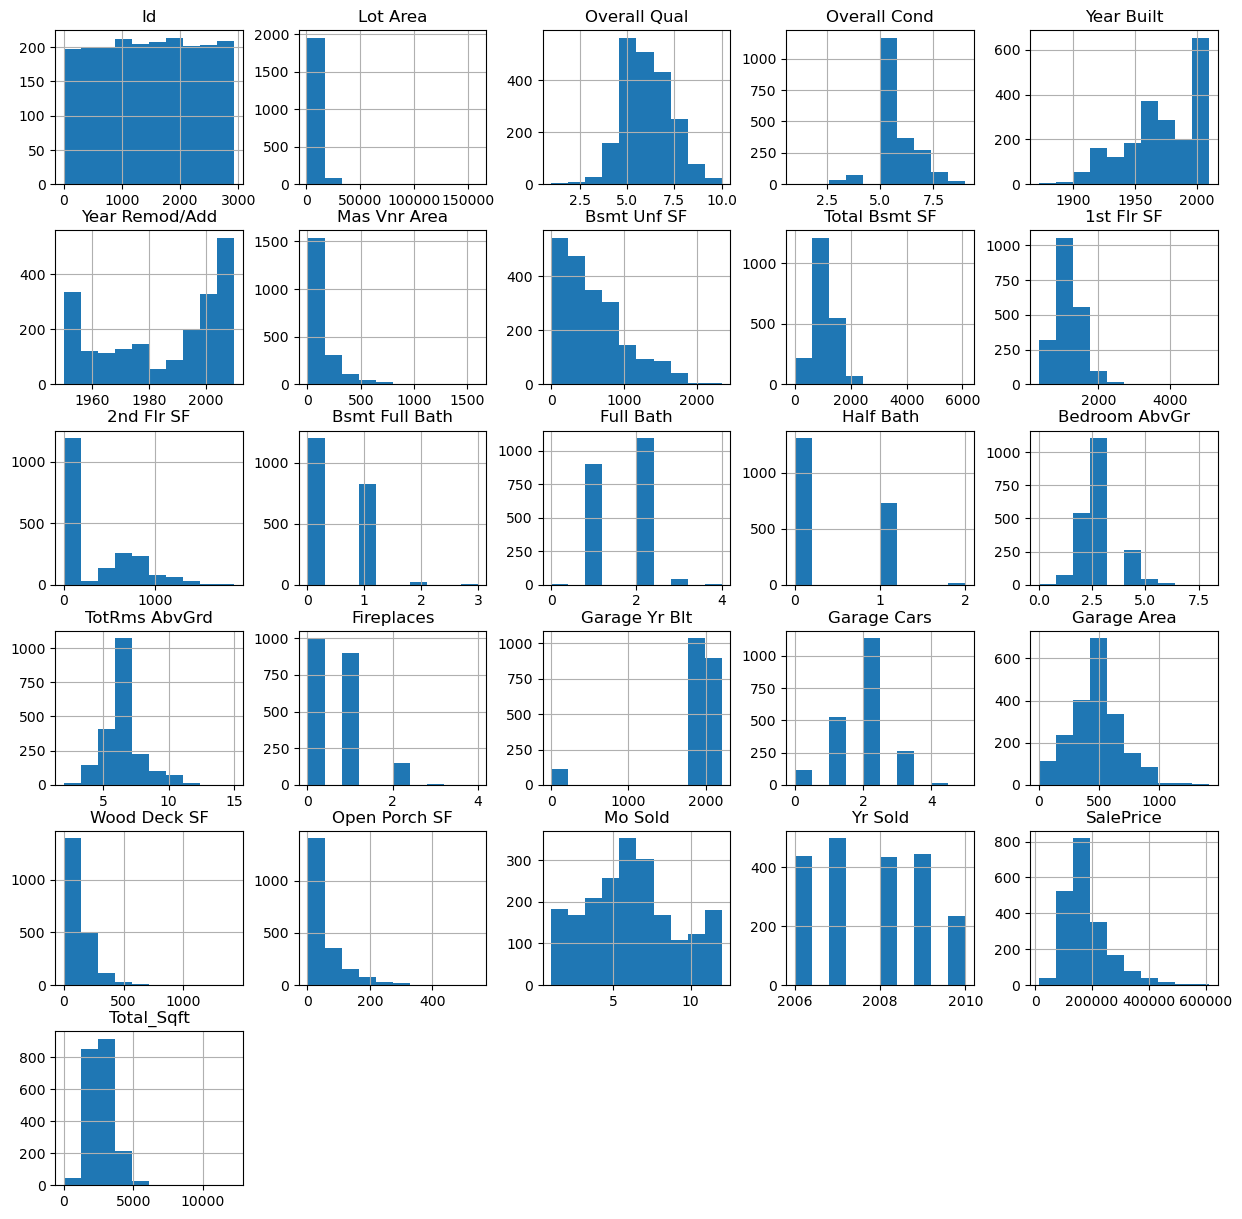

In [20]:
# Looking at histograms
train_new.hist(figsize=(15,15));

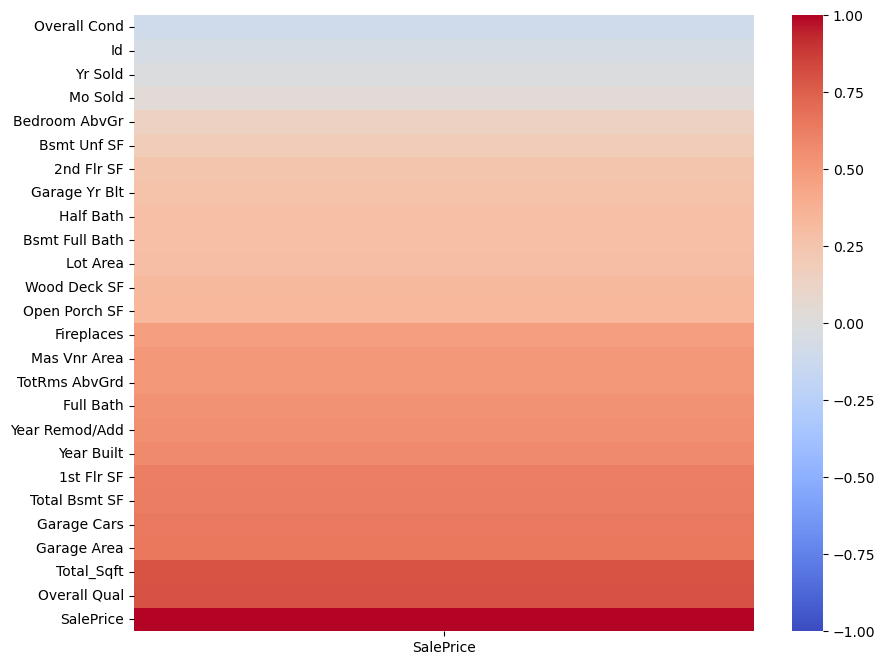

In [21]:
# Looking at the correlations to pick the top variables to use in the model
plt.figure(figsize=(10, 8))
sns.heatmap(train_new.corr(numeric_only = True)[['SalePrice']].sort_values('SalePrice'),
            cmap='coolwarm',
            vmin=-1,
            vmax=1);

In [22]:
# Looking at summary statistics of SalePrice
train_new.SalePrice.describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [23]:
train_new.columns

Index(['Id', 'Lot Area', 'Neighborhood', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
       'Exter Qual', 'Foundation', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Garage Type', 'Garage Yr Blt', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Mo Sold', 'Yr Sold', 'SalePrice', 'Total_Sqft'],
      dtype='object')

C:\Users\binit\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


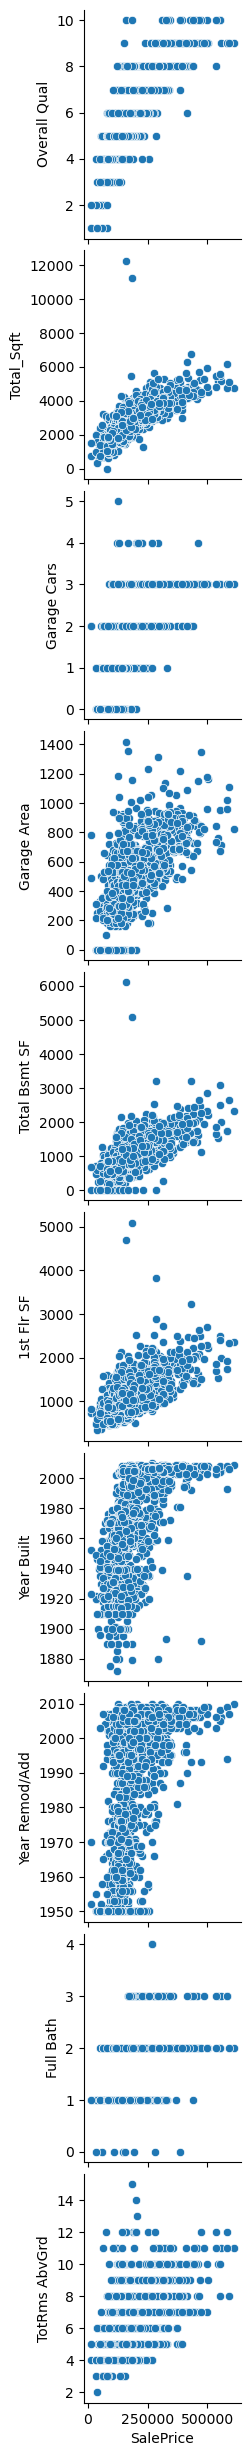

In [24]:
# Looking at pairplots of the top 10 variables that seem to be correlated to SalePrice
sns.pairplot(train_new, x_vars=['SalePrice'], y_vars=['Overall Qual','Total_Sqft', 'Garage Cars','Garage Area',
                                                      'Total Bsmt SF','1st Flr SF','Year Built', 'Year Remod/Add',
                                                      'Full Bath','TotRms AbvGrd']);

<Axes: >

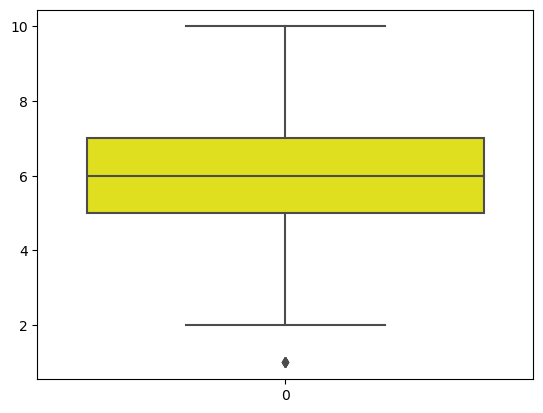

In [25]:
sns.boxplot(train_new['Overall Qual'],color='yellow')

<Axes: >

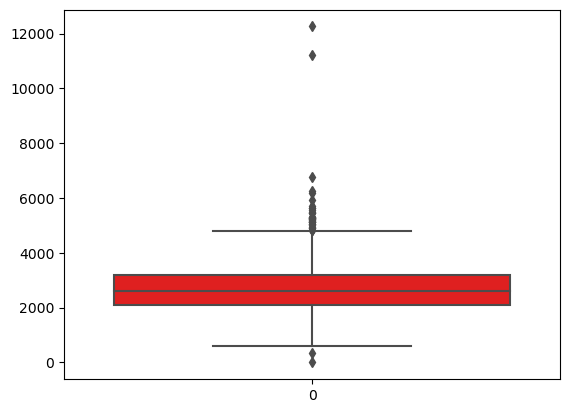

In [26]:
sns.boxplot(train_new['Total_Sqft'],color ='red')

<Axes: >

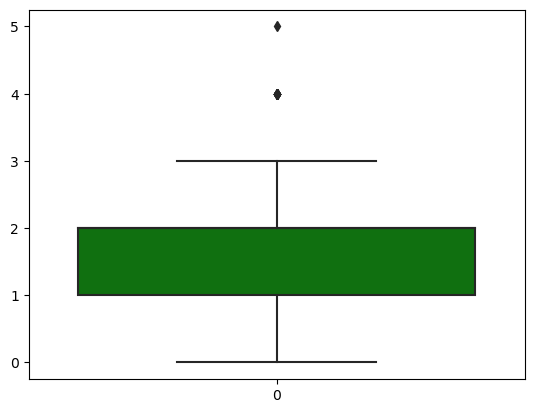

In [27]:
sns.boxplot(train_new['Garage Cars'],color ='green')

<Axes: >

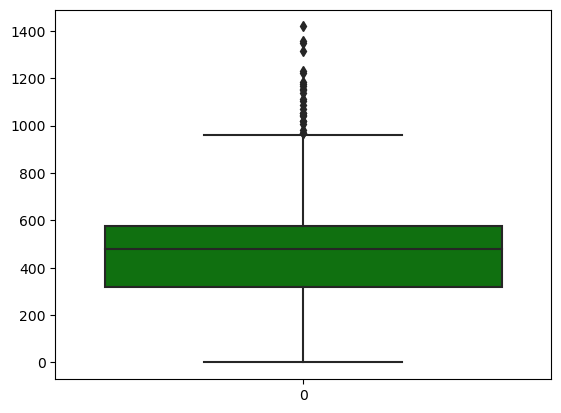

In [28]:
sns.boxplot(train_new['Garage Area'],color ='green')

<Axes: >

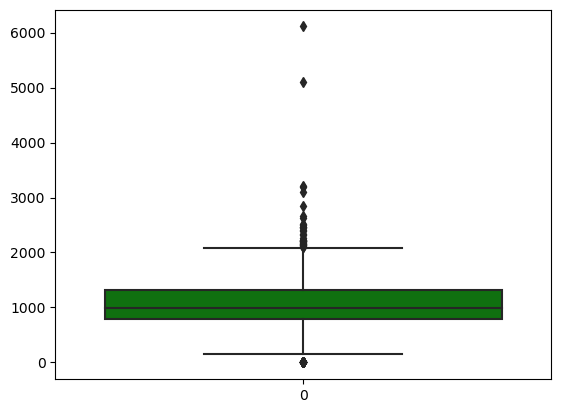

In [29]:
sns.boxplot(train_new['Total Bsmt SF'],color ='green') 

<Axes: >

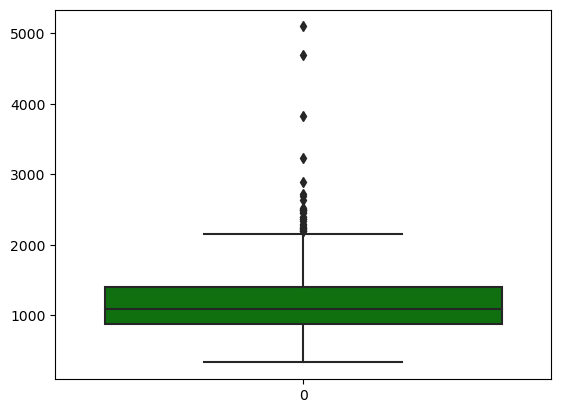

In [30]:
sns.boxplot(train_new['1st Flr SF'],color ='green')

<Axes: >

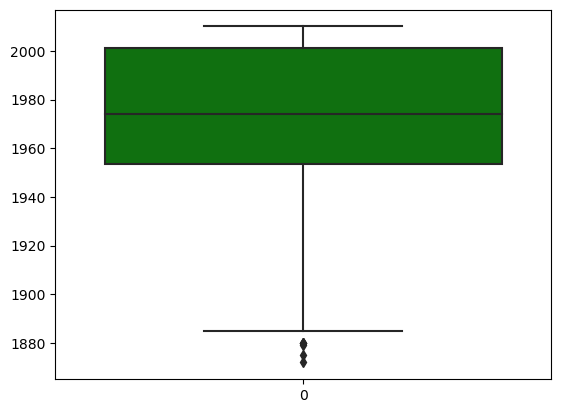

In [31]:
sns.boxplot(train_new['Year Built'],color ='green')

<Axes: >

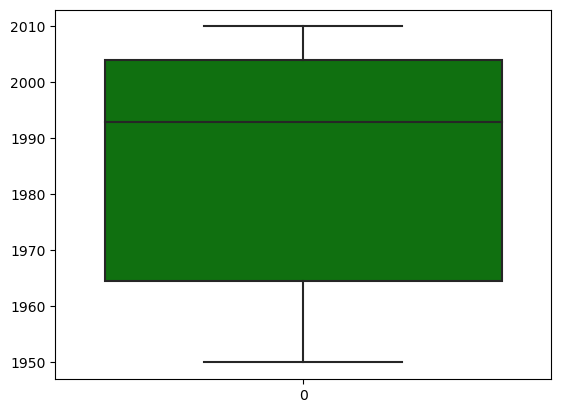

In [32]:
sns.boxplot(train_new['Year Remod/Add'],color ='green')

<Axes: >

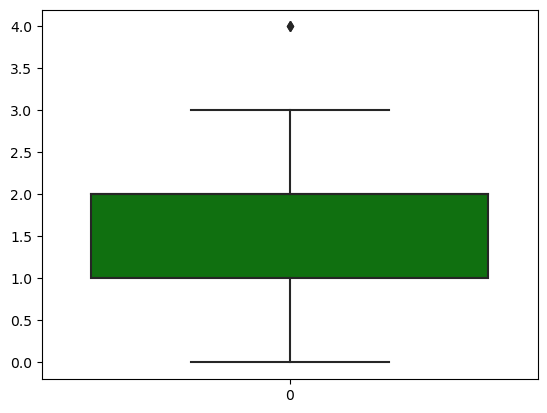

In [33]:
sns.boxplot(train_new['Full Bath'],color ='green')

<Axes: >

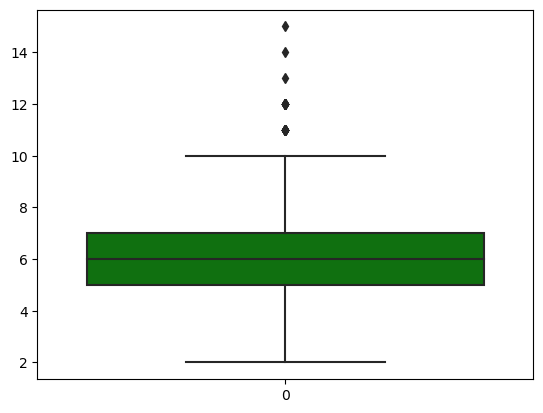

In [34]:
sns.boxplot(train_new['TotRms AbvGrd'],color ='green')

## Pre-processing and Modeling
- One-hot encode categorical variables.
- Train/test split your data.
- **Establish your baseline score.**
- Fit linear regression. Look at your coefficients. Are any of them wildly overblown?
- Go back and remove features that might be causing issues in your models.
- Tune hyperparameters.
- **Identify a production model.** (This does not have to be your best performing Kaggle model, but rather the model that best answers your problem statement.)
- Refine and interpret your production model.

In [35]:
# Using all numeric columns so don't need to do OneHot Encoding
train_new.dtypes

Id                  int64
Lot Area            int64
Neighborhood       object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Foundation         object
Bsmt Unf SF       float64
Total Bsmt SF     float64
1st Flr SF          int64
2nd Flr SF          int64
Bsmt Full Bath    float64
Full Bath           int64
Half Bath           int64
Bedroom AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Garage Type        object
Garage Yr Blt     float64
Garage Cars       float64
Garage Area       float64
Paved Drive        object
Wood Deck SF        int64
Open Porch SF       int64
Mo Sold             int64
Yr Sold             int64
SalePrice           int64
Total_Sqft        float64
dtype: objec

In [36]:
# Creating X and y variables
xvars = ['Overall Qual','Total_Sqft', 'Garage Cars','Garage Area',
         'Total Bsmt SF','1st Flr SF','Year Built', 'Year Remod/Add','Full Bath','TotRms AbvGrd']
X = train_new[xvars] 
y = train_new['SalePrice']

In [37]:
# Spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [38]:
# Baseline model
base_preds = [y_train.mean()]*len(y_test)

In [39]:
# Baseline RMSE
base_rmse = metrics.mean_squared_error(y_test, base_preds, squared=False)
base_rmse

70375.36301074116

**The baseline RSME tells us that we are $70,375 off on our predictions. We want our models to beat this.**

In [40]:
# Baseline R-squared score
metrics.r2_score(y_test, base_preds)

-0.029493958866121828

**The baseline R-squared is nearly 0 which makes sense since we are predicting every value to be the mean so there is no variability between the predictions.**

In [41]:
# Instantiate Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
# Get R-squared for train
lr.score(X_train, y_train)

0.8042904836770979

In [43]:
# Get R-squared for test
lr.score(X_test, y_test)

0.7242594948823295

**Model is close enough as test score is .72 and train score is .80 so likely not overfit.**

In [44]:
# Get MSE
mse = metrics.mean_squared_error(y_train, lr.predict(X_train))

In [45]:
# Get RMSE
rmse = np.sqrt(mse)
rmse

36300.46014930211

**RMSE score is telling us that we are $36,300 off on our predictions.**

## Inferential Visualizations
- Look at feature loadings.
- Look at how accurate your predictions are.
- Is there a pattern to your errors? Consider reworking your model to address this.


In [46]:
preds = lr.predict(X_test)

In [47]:
resids = y_test - preds

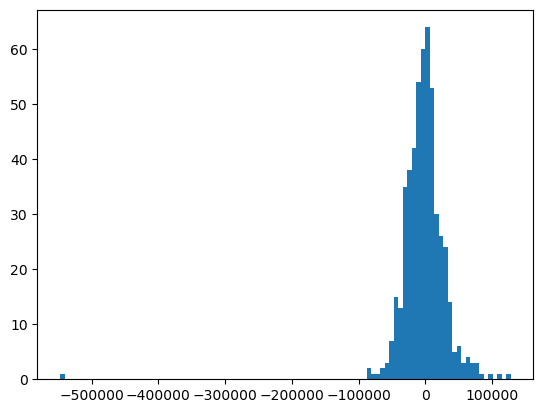

In [48]:
# Creating histogram of residuals
plt.hist(resids, bins = 100);

**We can see from the histogram above we have an even amount of residuals on both sides of 0.**

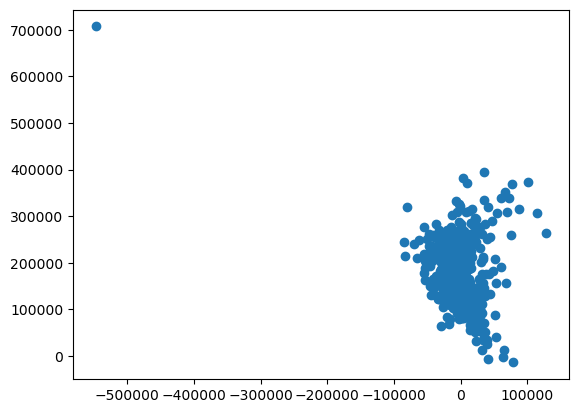

In [49]:
# Creating scatter plot of residuals vs predictions
plt.scatter(resids, preds);

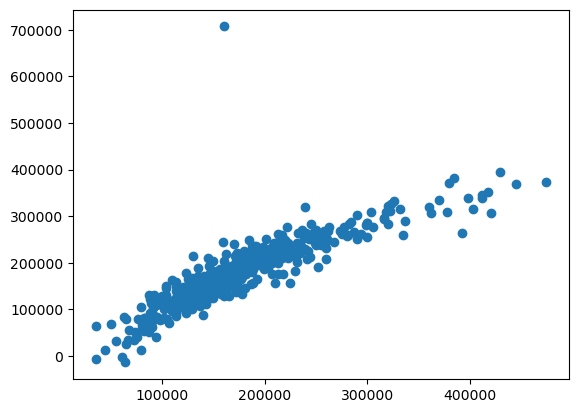

In [50]:
# Creating scatter plot of actuals vs predictions
plt.scatter(y_test, preds);

## Business Recommendations
- Which features appear to add the most value to a home?
- Which features hurt the value of a home the most?
- Do you feel that this model will generalize to other cities? How could you revise your model to make it more universal OR what date would you need from another city to make a comparable model?

In [51]:
pd.Series(lr.coef_, X.columns)

Overall Qual      20242.224100
Total_Sqft           43.424633
Garage Cars       -1795.929883
Garage Area          53.107347
Total Bsmt SF       -17.634840
1st Flr SF           15.542571
Year Built          204.158044
Year Remod/Add      341.575272
Full Bath         -6379.691256
TotRms AbvGrd       532.656293
dtype: float64

In [52]:
import statsmodels.api as sm
X = sm.add_constant(X)
ols = sm.OLS(y,X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     781.9
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:31:58   Log-Likelihood:                -24430.
No. Observations:                2051   AIC:                         4.888e+04
Df Residuals:                    2040   BIC:                         4.894e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.121e+06   1.04e+05    -10.826      0.000   -1.32e+06   -9.18e+05
Overall Qual    2.026e+04    909.497     22.281      0.000    1.85e+04     2.2e+04
Total_Sqft        39.4922      2.796     14.126      0.000      34.010      44.975
Garage Cars     5660.6263   2499.169      2.265      0.024     759.438    1.06e+04
Garage Area       32.3686      8.694      3.723      0.000      15.318      49.419
Total Bsmt SF    -22.9016      4.204     -5.447      0.000     -31.147     -14.656
1st Flr SF        18.9976      3.731      5.092      0.000      11.681      26.314
Year Built       224.7233     40.137      5.599      0.000     146.010     303.437
Year Remod/Add   306.3729     52.846      5.797      0.000     202.735     410.011
Full Bath      -5905.0996   2067.562     -2.856      0.004   -9959.853   -1850.346
TotRms AbvGrd   1173.2071    834.364      1.406      0.160    -463.087    2809.501
==============================================================================
Omnibus:                      823.355   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85916.189
Skew:                          -0.908   Prob(JB):                         0.00
Kurtosis:                      34.655   Cond. No.                     5.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Kaggle Submission

In [53]:
# Add Total_Sqft column to test dataset as that was also added to train dataset
test['Total_Sqft']= test['Total Bsmt SF']+test['Wood Deck SF']+test['Open Porch SF']+test['1st Flr SF']+test['2nd Flr SF']

In [54]:
# Do predictions on test
preds = lr.predict(test[xvars])

In [55]:
# Make SalePrice column in test as test does not have that column
# Add preds to the SalePrice column
test['SalePrice'] = preds

In [56]:
# Making sure the data looks correct
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Total_Sqft,SalePrice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,0,0,4,2006,WD,3008,164174.396075
1,2718,905108090,90,RL,0.0,9662,Pave,0,IR1,Lvl,...,0,0,0,0,0,8,2006,WD,4104,220357.834860
2,2414,528218130,60,RL,58.0,17104,Pave,0,IR1,Lvl,...,0,0,0,0,0,9,2006,New,2274,190327.545841
3,1989,902207150,30,RM,60.0,8520,Pave,0,Reg,Lvl,...,0,0,0,0,0,7,2007,WD,1936,125590.231149
4,625,535105100,20,RL,0.0,9500,Pave,0,IR1,Lvl,...,0,0,0,0,0,7,2009,WD,2864,181056.099116


In [57]:
# Creating submission dataset
# We only want the Id and SalePrice columns for our Kaggle submission
submission_01 = test[['Id', 'SalePrice']]

In [58]:
# There is an extra index column that we don't need so will set index to be Id column
submission_01 = submission_01.set_index('Id')

In [59]:
# Writing csv file for submission
submission_01.to_csv('Project 2 Submission 1 - Top 10 correlations_na_zero.csv')

In [60]:
# Checking to see what the submission looks like
submission_01

,SalePrice
Id,
2658,164174.396075
2718,220357.834860
2414,190327.545841
1989,125590.231149
625,181056.099116
...,...
1662,189393.553570
1234,207873.150895
1373,131854.597570
